## 1) Cargar una imagen distinta y aplicar operaciones básicas

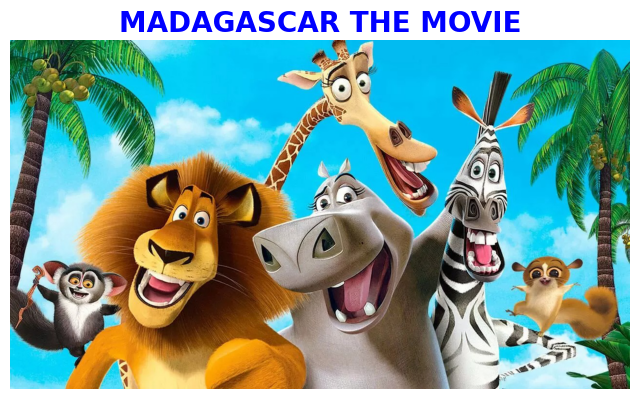

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as image

# 1. Cargar la imagen

ruta_archivo = r"C:\Users\HP\Documents\Mestría\Materia1\Repo\Semana1\Imagen_Carga.jpeg"

try:
    img = image.imread(ruta_archivo) 
    
    # 2. Mostrar la imagen
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    
    # 3. Configurar la visualización
    plt.title("MADAGASCAR THE MOVIE", fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'blue'}  )
    plt.axis('off')  # Oculta los ejes (coordenadas de píxeles)
    plt.show()

except FileNotFoundError:
    print("Error: No se encontró el archivo de imagen. Asegúrate de que esté en la misma carpeta.")

OPERACIONES GEOMÉTRICAS

Dimensiones: 1280px de ancho x 720px de alto
Formato: JPEG
Modo de color: RGB

Dimensiones de imagen Redimensionada: 720px de ancho x 480px de alto


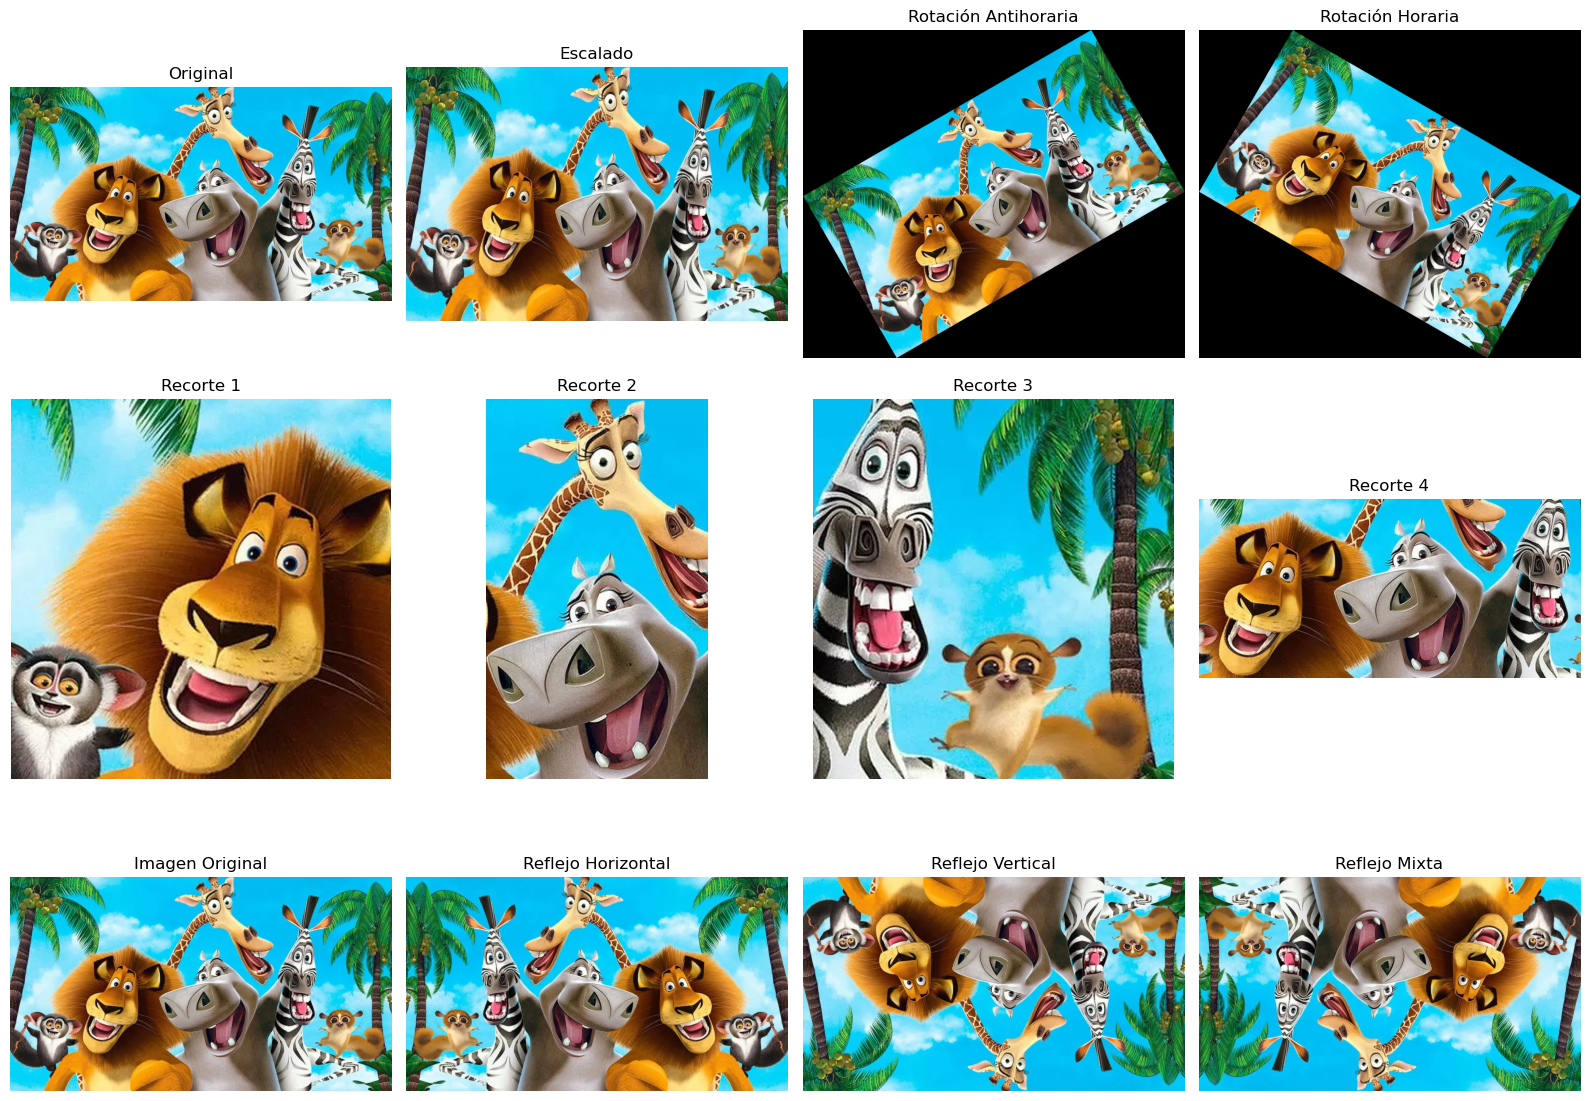

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

imagen = r"C:\Users\HP\Documents\Mestría\Materia1\Repo\Semana1\Imagen_Carga.jpeg"

# 1. Cargar la imagen
img = Image.open(imagen)

# Obtener información
ancho, alto = img.size  # Encontramos las dimensiones originales de la imagen
formato = img.format  # Nos muestra el formato de la imagen cargada. Para este caso es : Webp
modo = img.mode      # Esta imagen es en RGB

print(f"Dimensiones: {ancho}px de ancho x {alto}px de alto")
print(f"Formato: {formato}")
print(f"Modo de color: {modo}")

# A. ESCALADO (Resizing)
# Redefinimos el nuevo tamaño de la imagen (ancho, alto)
img_newsize = img.resize((720, 480))
ancho_new, alto_new = img_newsize.size  # Encontramos las dimensiones de la imagen escalada
print(f"\nDimensiones de imagen Redimensionada: {ancho_new}px de ancho x {alto_new}px de alto")


# B. ROTACIÓN
# Girar 30 grados, tanto a la derecha como a la izquierda. 'expand=True' ajusta el lienzo para que no se corten las esquinas
img_rotada_izq = img.rotate(30, expand=True)
img_rotada_dere = img.rotate(-30, expand=True)

# C. RECORTE (Cropping)
# Definimos los cuadros para cada recorte: (izquierda, superior, derecha, inferior)
cuadro1 = (100, 200, 500, 600)
cuadro2 = (500, 000, 850, 600)
cuadro3 = (900, 200, 1280, 600)
cuadro4 = (200, 200, 1050, 600)

img_recortada1 = img.crop(cuadro1)
img_recortada2 = img.crop(cuadro2)
img_recortada3 = img.crop(cuadro3)
img_recortada4 = img.crop(cuadro4)


# D. REFLEJO (Flip)
# FLIP_LEFT_RIGHT para espejo horizontal, FLIP_TOP_BOTTOM para vertical
img_reflejada_hori = img.transpose(Image.FLIP_LEFT_RIGHT)
img_reflejada_vert = img.transpose(Image.FLIP_TOP_BOTTOM)

# Podemos realizar el espejo de una imagen reflejada previamente
img_reflejada_vert_hori= img_reflejada_vert.transpose(Image.FLIP_LEFT_RIGHT)

# --- VISUALIZACIÓN --- Creamos una matriz de subplots de 3 filas y 4 columnas para mostrar todas las transformaciones
fig, axs = plt.subplots(3, 4, figsize=(16, 12))

axs[0,0].imshow(img); axs[0,0].set_title("Original")
axs[0,1].imshow(img_newsize); axs[0,1].set_title("Escalado")
axs[0,2].imshow(img_rotada_izq); axs[0,2].set_title("Rotación Antihoraria")
axs[0,3].imshow(img_rotada_dere); axs[0,3].set_title("Rotación Horaria")
axs[1,0].imshow(img_recortada1); axs[1,0].set_title("Recorte 1")
axs[1,1].imshow(img_recortada2); axs[1,1].set_title("Recorte 2")
axs[1,2].imshow(img_recortada3); axs[1,2].set_title("Recorte 3")
axs[1,3].imshow(img_recortada4); axs[1,3].set_title("Recorte 4")
axs[2,0].imshow(img); axs[2,0].set_title("Imagen Original")
axs[2,1].imshow(img_reflejada_hori); axs[2,1].set_title("Reflejo Horizontal")
axs[2,2].imshow(img_reflejada_vert); axs[2,2].set_title("Reflejo Vertical")
axs[2,3].imshow(img_reflejada_vert_hori); axs[2,3].set_title("Reflejo Mixta")



for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()
plt.show()

OPERACIONES DE PUNTO

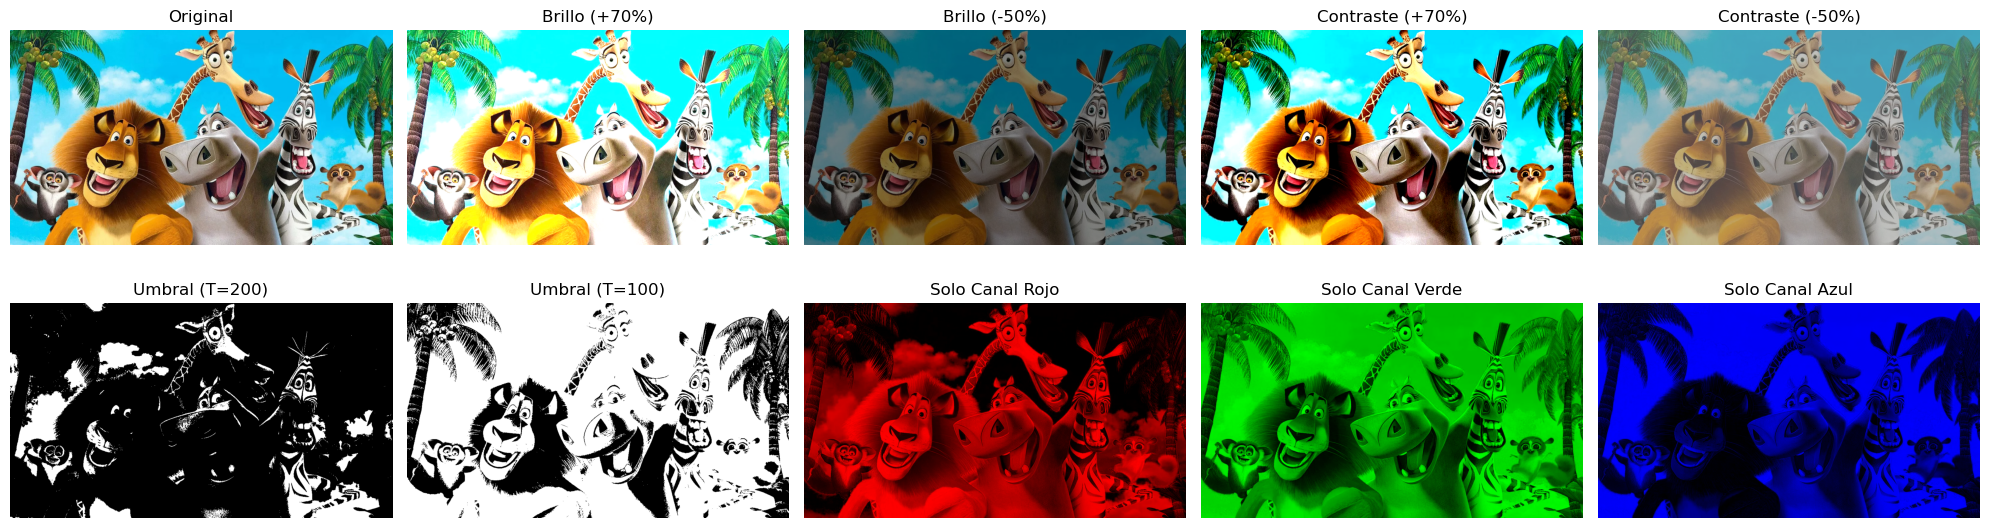

In [12]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

imagen = r"C:\Users\HP\Documents\Mestría\Materia1\Repo\Semana1\Imagen_Carga.jpeg"
# 1. Cargar la imagen
img = Image.open(imagen)

# --- OPERACIONES DE PUNTO ---

# A. Ajuste de Brillo
# 1.0 es original, < 1.0 oscurece, > 1.0 aclara
cambio_brillo = ImageEnhance.Brightness(img)
img_brillo_aclarado = cambio_brillo.enhance(1.70) # Aclarar brillo significativamente
img_brillo_oscurecido = cambio_brillo.enhance(0.5) # Oscurecer brillo significativamente

# B. Ajuste de Contraste
# 1.0 es original, < 1.0 reduce contraste, > 1.0 aumenta
cambio_contraste = ImageEnhance.Contrast(img)
img_contraste_aumentado = cambio_contraste.enhance(1.7) # Aumentar contraste significativamente
img_contraste_reducido = cambio_contraste.enhance(0.5) # Reducir contraste significativamente

# C. Umbralización (Thresholding)
# Primero convertimos a escala de grises ('L')
img_gris = img.convert('L')
umbral1 = 200
umbral2 = 100
# Si el píxel es > umbral, ponemos 255 (blanco), si no 0 (negro)
img_umbral1 = img_gris.point(lambda p: 255 if p > umbral1 else 0, mode='1')
img_umbral2 = img_gris.point(lambda p: 255 if p > umbral2 else 0, mode='1')

# D. Cambio de imagen a tonos RGB 

# 1. Cargar la imagen y asegurar que esté en modo RGB
# Esto evita errores si la imagen tiene transparencia (RGBA)
Original_rgb = Image.open(imagen).convert("RGB")

# 2. Separar los canales (Rojo, Verde, Azul) de la imagen original
r, g, b = Original_rgb.split()

# 3. Crear un canal vacío (negro)
# Tomamos el canal 'r' como referencia de tamaño y lo llenamos de ceros
ceros = r.point(lambda _: 0)

# 4. Crear las versiones modificadas
# Sintaxis de merge: (Canal_Rojo, Canal_Verde, Canal_Azul)

# Creamos la imagen con tono solo ROJO (R=Original, G=0, B=0)
img_rojo = Image.merge("RGB", (r, ceros, ceros))
# Creamos la imagen con tono solo VERDE (R=0, G=Original, B=0) 
img_verde = Image.merge("RGB", (ceros, g, ceros))
# Creamos la imagen con tono solo AZUL (R=0, G=0, B=Original)
img_azul = Image.merge("RGB", (ceros, ceros, b))



# --- VISUALIZACIÓN ---
fig, axs = plt.subplots(2, 5, figsize=(20, 6))

axs[0,0].imshow(img); axs[0,0].set_title("Original")
axs[0,1].imshow(img_brillo_aclarado); axs[0,1].set_title("Brillo (+70%)")
axs[0,2].imshow(img_brillo_oscurecido); axs[0,2].set_title("Brillo (-50%)")
axs[0,3].imshow(img_contraste_aumentado); axs[0,3].set_title("Contraste (+70%)")
axs[0,4].imshow(img_contraste_reducido); axs[0,4].set_title("Contraste (-50%)")

axs[1,0].imshow(img_umbral1, cmap='gray'); axs[1,0].set_title(f"Umbral (T={umbral1})")
axs[1,1].imshow(img_umbral2, cmap='gray'); axs[1,1].set_title(f"Umbral (T={umbral2})")

axs[1,2].imshow(img_rojo); axs[1,2].set_title("Solo Canal Rojo")
axs[1,3].imshow(img_verde); axs[1,3].set_title("Solo Canal Verde")
axs[1,4].imshow(img_azul); axs[1,4].set_title("Solo Canal Azul")

for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()
plt.show()

Operaciones de vecindad

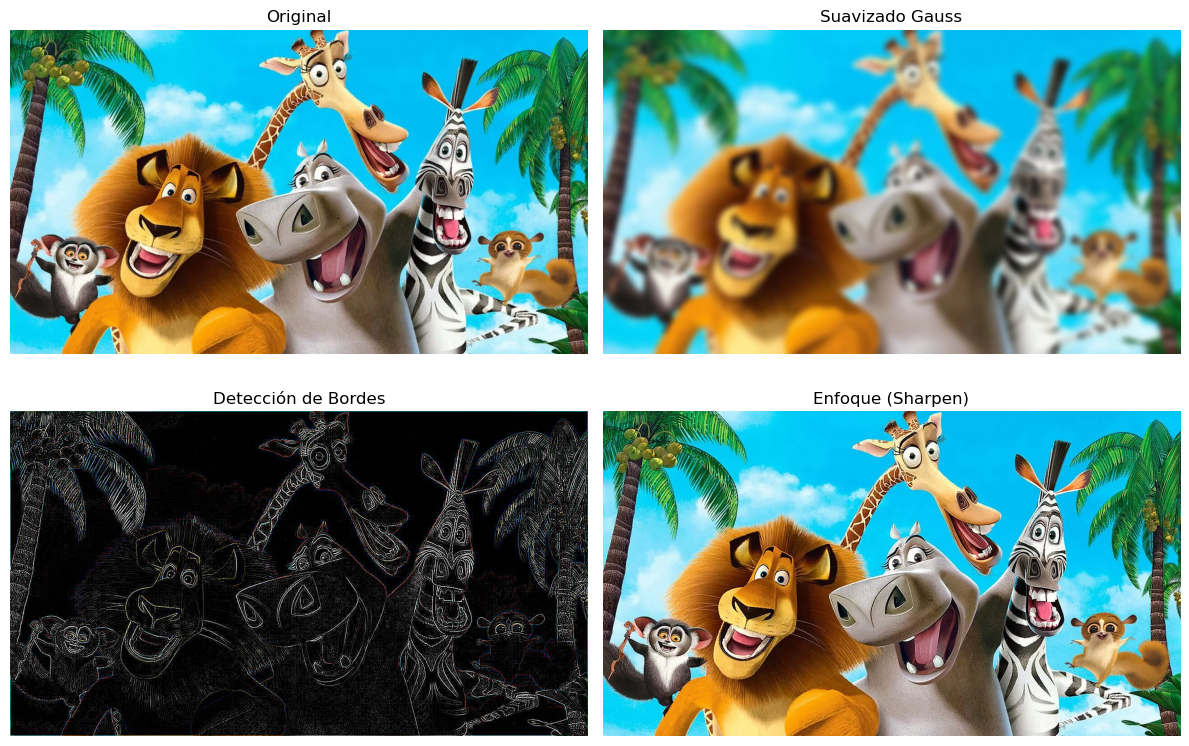

In [13]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

imagen = r"C:\Users\HP\Documents\Mestría\Materia1\Repo\Semana1\Imagen_Carga.jpeg"
# 1. Cargar la imagen
img = Image.open(imagen)

# --- OPERACIONES DE VECINDAD ---

# A. Suavizado (Blurring)
# Usa un kernel de promedio para "difuminar" la imagen
img_blur = img.filter(ImageFilter.BLUR)
# Para un control más fuerte, se puede usar GaussianBlur
img_gauss = img.filter(ImageFilter.GaussianBlur(radius=6))

# B. Detección de Bordes (Find Edges)
# Resalta las siluetas donde hay cambios bruscos de color
img_bordes = img.filter(ImageFilter.FIND_EDGES)

# C. Enfoque (Sharpening)
# Mejora el detalle en los bordes
img_enfoque = img.filter(ImageFilter.SHARPEN)

# --- VISUALIZACIÓN ---
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0,0].imshow(img); axs[0,0].set_title("Original")
axs[0,1].imshow(img_gauss); axs[0,1].set_title("Suavizado Gauss")


axs[1,0].imshow(img_bordes, cmap='gray'); axs[1,0].set_title(f"Detección de Bordes")
axs[1,1].imshow(img_enfoque, cmap='gray'); axs[1,1].set_title(f"Enfoque (Sharpen)")

for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()
plt.show()


## 2) Foto con cámara: características + recorte SOLO ojos
1) Captura una foto presionando **S**.
2) Se imprime **tamaño** y **forma**.
3) Recorta manualmente los ojos con `selectROI` y guarda el recorte.

In [ ]:
import os
from datetime import datetime

import cv2
import numpy as np
import matplotlib.pyplot as plt

def bgr_to_rgb(img_bgr):
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

def show(img, title="", cmap=None, figsize=(6,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    if img is None:
        plt.text(0.5, 0.5, "Imagen vacía", ha="center")
        plt.axis("off")
        plt.show()
        return
    if len(img.shape) == 2:
        plt.imshow(img, cmap=cmap or "gray")
    else:
        plt.imshow(img if img.shape[2] != 3 else img)
    plt.axis("off")
    plt.show()

def save_image(path, img_bgr_or_gray):
    os.makedirs(os.path.dirname(path) or ".", exist_ok=True)
    ok = cv2.imwrite(path, img_bgr_or_gray)
    if not ok:
        raise RuntimeError(f"No se pudo guardar: {path}")
    return path

def stamp(name, ext="jpg"):
    ts = datetime.now().strftime("%Y%m%d_%H%M%S")
    return f"{name}_{ts}.{ext}"

print("OpenCV:", cv2.__version__)


OpenCV: 4.12.0


Cámara lista. Presiona 's' para guardar foto, 'q' para salir.
Características de la foto capturada:
 - Alto x Ancho: (480, 640)
 - Shape: (480, 640, 3)
 - Tipo: uint8
Guardado: foto_camara.jpg


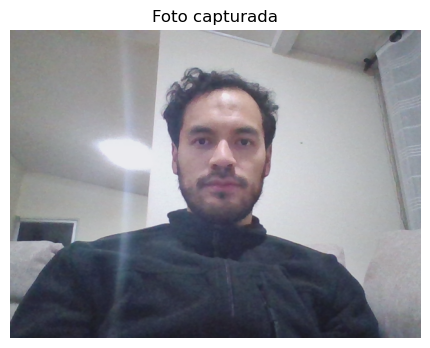

In [3]:
import cv2
# Captura de foto desde cámara
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise RuntimeError("No se pudo acceder a la cámara. Revisa permisos o si está ocupada.")

print("Cámara lista. Presiona 's' para guardar foto, 'q' para salir.")
foto_bgr = None

while True:
    ret, frame = cap.read()
    if not ret:
        break

    cv2.imshow("Camara (s=guardar, q=salir)", frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord('s'):
        foto_bgr = frame.copy()
        break
    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

if foto_bgr is None:
    raise RuntimeError("No se capturó foto. Reintenta.")

print("Características de la foto capturada:")
print(" - Alto x Ancho:", foto_bgr.shape[:2])
print(" - Shape:", foto_bgr.shape)
print(" - Tipo:", foto_bgr.dtype)

foto_path = save_image("foto_camara.jpg", foto_bgr)
print("Guardado:", foto_path)

show(bgr_to_rgb(foto_bgr), "Foto capturada")

Recorte guardado: foto_ojos.jpg


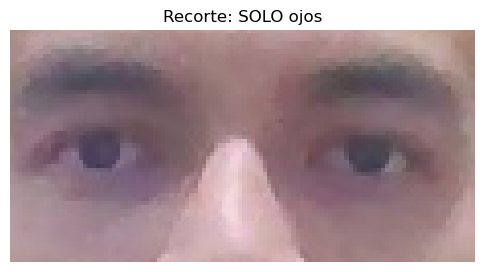

In [4]:
# Recorte SOLO ojos (manual con selectROI)
img = cv2.imread("foto_camara.jpg")
if img is None:
    raise FileNotFoundError("No existe foto_camara.jpg")

roi = cv2.selectROI("Selecciona SOLO los ojos y presiona ENTER", img, showCrosshair=True)
cv2.destroyAllWindows()

x, y, w, h = roi
if w == 0 or h == 0:
    raise RuntimeError("No se seleccionó un ROI válido.")

ojos = img[y:y+h, x:x+w]
ojos_path = save_image("foto_ojos.jpg", ojos)
print("Recorte guardado:", ojos_path)

show(bgr_to_rgb(ojos), "Recorte: SOLO ojos")


## 3) Misma foto: rotar 180°, reflejo y mejorar enfoque
Aporte extra: guardo todas las salidas con nombres claros.

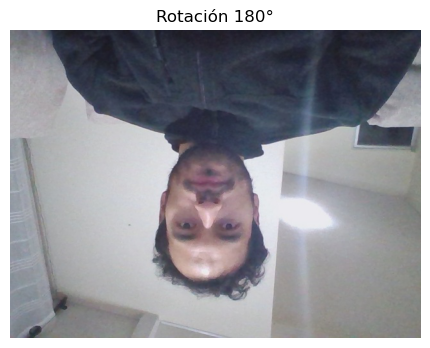

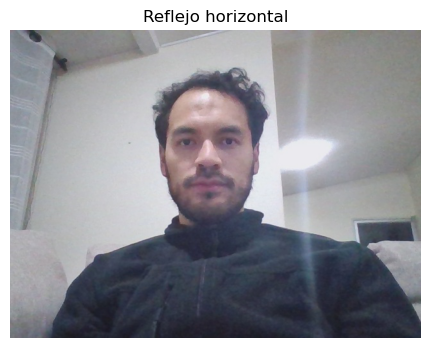

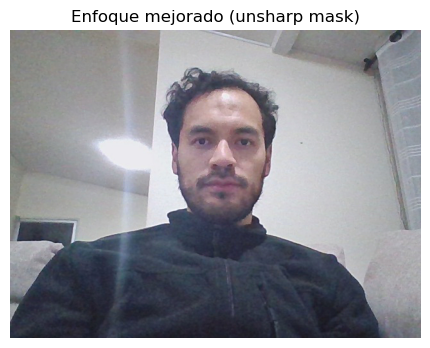

Listo: foto_rot180.jpg, foto_reflejo.jpg, foto_enfoque.jpg


In [5]:
img = cv2.imread("foto_camara.jpg")
if img is None:
    raise FileNotFoundError("No existe foto_camara.jpg")

rot180 = cv2.rotate(img, cv2.ROTATE_180)
reflejo = cv2.flip(img, 1)  # espejo horizontal

# Enfoque: Unsharp mask (aporte extra, mejora real)
blur = cv2.GaussianBlur(img, (0,0), 2.0)
enfoque = cv2.addWeighted(img, 1.5, blur, -0.5, 0)

save_image("foto_rot180.jpg", rot180)
save_image("foto_reflejo.jpg", reflejo)
save_image("foto_enfoque.jpg", enfoque)

show(bgr_to_rgb(rot180), "Rotación 180°")
show(bgr_to_rgb(reflejo), "Reflejo horizontal")
show(bgr_to_rgb(enfoque), "Enfoque mejorado (unsharp mask)")
print("Listo: foto_rot180.jpg, foto_reflejo.jpg, foto_enfoque.jpg")


## 4) Foto con persona con lentes: bordes para lentes + silueta
- Bordes globales → contornos grandes = **silueta**
- ROI en zona de ojos → bordes + morfología → contornos filtrados = **lentes**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ---------------- CAPTURA DE IMAGEN ----------------
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: No se pudo acceder a la cámara.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    cv2.imshow('Presiona S para tomar foto', frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord('s'):
        nombre_foto = "foto_lentes.jpg"
        cv2.imwrite(nombre_foto, frame)
        break
    elif key == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        exit()

cap.release()
cv2.destroyAllWindows()

# ---------------- PROCESAMIENTO ----------------
img_bgr = cv2.imread(nombre_foto)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Detector de rostro
face_cascade = cv2.CascadeClassifier(
    "haarcascade_frontalface_default.xml"
)

faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)

img_resultado = img_rgb.copy()

edges = None

for (x, y, w, h) in faces:
    # ---- REGIÓN DE LOS OJOS (donde están los lentes) ----
    roi_gray = img_gray[y:y + h//2, x:x + w]
    roi_color = img_resultado[y:y + h//2, x:x + w]

    # Suavizado
    roi_blur = cv2.GaussianBlur(roi_gray, (5, 5), 0)

    # Bordes
    edges = cv2.Canny(roi_blur, 50, 150)

    # Contornos
    contornos, _ = cv2.findContours(
        edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    for cnt in contornos:
        area = cv2.contourArea(cnt)

        if 200 < area < 5000:
            x2, y2, w2, h2 = cv2.boundingRect(cnt)
            relacion = w2 / float(h2)

            # Los lentes suelen ser más anchos que altos
            if 1.2 < relacion < 4:
                cv2.rectangle(
                    roi_color,
                    (x2, y2),
                    (x2 + w2, y2 + h2),
                    (0, 255, 0),
                    2
                )

# ---------------- VISUALIZACIÓN ----------------
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].imshow(img_rgb)
axs[0].set_title("Imagen")

if edges is not None:
    axs[1].imshow(edges, cmap="gray")
    axs[1].set_title("Bordes de los ojos")
else:
    axs[1].set_title("No se detectó rostro")


for ax in axs:
    ax.axis("off")

plt.tight_layout()
plt.show()


AttributeError: module 'cv2' has no attribute 'data'